<a href="https://colab.research.google.com/github/mara21500/study/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%B3%91%EC%95%84%EB%A6%AC%EB%B0%98_%EC%97%AC%EC%84%AF_%EB%B2%88%EC%A7%B8_%EC%8B%9C%EA%B0%84_%EC%86%90%EA%B8%80%EC%94%A8_%EC%98%88%EC%B8%A1_%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# tensorflow 라이브러리 설치
!pip install tensorflow

     |████████████████████████████████| 462 kB 7.7 MB/s 


In [2]:
# 딥러닝 관련 라이브러리 불러오기
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# MNIST 데이터셋 불러오기
mnist = keras.datasets.mnist

In [4]:
# MNIST 데이터셋 학습용(x,y), 테스트용(x,y)으로 나누기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
# 학습용 데이터 형태 살펴보기
x_train.shape

(60000, 28, 28)

In [6]:
# 학습용 첫 번째 데이터 살펴보기1
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [24]:
# 학습용 첫 번째 데이터 살펴보기2
y_train[1]

0

In [8]:
# 데이터 전처리(0 ~ 1 사이 숫자로)
x_train = x_train / 255
x_test = x_test / 255

In [9]:
# 데이터 전처리 결과 확인
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
# 모델 만들기 : 입력층(784) - 은닉층1(256) - 은닉층2(128) - 은닉층3(64) - 출력층(10)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax') # 확률 출력해준다
])

In [11]:
# 모델 컴파일 : 최적화 함수, 손실 함수 설정 + 평가 지표 설정 + 가중치 초기화)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [12]:
# 모델 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [13]:
# 모델 학습 : 전체 데이터는 5번 반복
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2111 - accuracy: 0.9367
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0909 - accuracy: 0.9719
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0635 - accuracy: 0.9796
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0494 - accuracy: 0.9839
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0398 - accuracy: 0.9872


In [14]:
# 모델 평가
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0833 - accuracy: 0.9779


[0.08329163491725922, 0.9779000282287598]

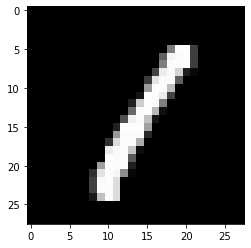

In [28]:
# 예측 - 0번째 숫자 이미지로 보기
plt.imshow(x_train[3], cmap='gray')
plt.show()

In [20]:
# 예측 - 0번째 숫자 예측하기1
print(model.predict(x_train[1].reshape(1, 28, 28)))

[[9.9997604e-01 1.8142483e-08 1.1523753e-06 3.8446322e-09 1.2071862e-08
  1.4974745e-09 6.7430656e-06 3.9457400e-06 1.1476899e-08 1.2013961e-05]]


In [26]:
# 예측 - 0번째 숫자 예측하기1
print(np.argmax(model.predict(x_train[3].reshape(1, 28, 28))))

1
